<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/exercicio_pandas_graficos_complementar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício Pandas Complementar

1. Abra o arquivo DiamondsPrices.csv
2. Determine qual o valor do diamante mais caro na tabela e quantos quilates (carat) ele tem
3. Determine a média e o desvio padrão dos preços dos diamantes
4. Determine qual o diamante mais caro para cada tipo de corte (cut)
5. Determine qual o diamante mais caro para cada tipo de cor (color)
6. Determine qual o diamante mais caro para cada tipo de claridade (clarity)
7. Admitindo que a forma do diamante seja a de um cone de base elíptica, crie uma coluna com o volume aproximado do diamante dado pela equação

$$ V = \frac{1}{3}\pi xyz $$

8. Faça um gráfico de pontos do preço do diamante em função dos quilates (carat) colorindo os pontos com uma cor para cada tipo de corte (cut). Você observa alguma relação entre essas variáveis?

9. Faça um gráfico de pontos do quilate (carat) em função do volume colorindo os pontos com uma cor para cada tipo de claridade (clarity). Você observa alguma relação entre essas variáveis?

Abra o arquivo DiamondsPrices.csv

In [145]:
import pandas as pd

df = pd.read_csv("DiamondsPrices.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Determine qual o valor do diamante mais caro na tabela e quantos quilates (carat) ele tem

In [146]:
index_needed = df["price"].idxmax()
df.iloc[[index_needed]]

# alternativa
# df.query('price == price.max()')

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


Determine a média e o desvio padrão dos preços dos diamantes

In [147]:
mean_price = df["price"].mean()
mean_price

3932.799721913237

In [148]:
std_price = df["price"].std(ddof=1)
std_price

3989.439738146379

Determine qual o diamante mais caro para cada tipo de corte (cut)

In [149]:
df.groupby(['cut']).max()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,5.01,J,VVS2,79.0,95.0,18574,10.74,10.54,6.98
Good,3.01,J,VVS2,67.0,66.0,18788,9.44,9.38,5.79
Ideal,3.50,J,VVS2,66.7,63.0,18806,9.65,31.80,6.03
Premium,4.01,J,VVS2,63.0,62.0,18823,10.14,58.90,8.06
Very Good,4.00,J,VVS2,64.9,66.0,18818,10.01,9.94,31.80


Determine qual o diamante mais caro para cada tipo de cor (color)

In [150]:
df.groupby(['color']).max()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,3.40,Very Good,VVS2,71.6,73.0,18693,9.42,9.34,6.27
E,3.05,Very Good,VVS2,79.0,73.0,18731,9.26,31.80,31.80
F,3.01,Very Good,VVS2,71.0,95.0,18791,9.24,9.13,5.73
G,3.01,Very Good,VVS2,72.9,76.0,18818,9.44,9.37,6.16
H,4.13,Very Good,VVS2,71.8,73.0,18803,10.00,58.90,8.06
I,4.01,Very Good,VVS2,71.3,70.0,18823,10.14,10.10,6.31
J,5.01,Very Good,VVS2,73.6,68.0,18710,10.74,10.54,6.98


Determine qual o diamante mais caro para cada tipo de claridade (clarity)

In [151]:
df.groupby(['clarity']).max()

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
I1,5.01,Very Good,J,78.2,67.0,18531,10.74,10.54,6.98
IF,2.29,Very Good,J,65.6,65.0,18806,8.49,8.49,5.20
SI1,2.57,Very Good,J,72.9,95.0,18818,8.90,8.87,5.49
SI2,3.04,Very Good,J,72.2,79.0,18804,9.51,58.90,8.06
VS1,2.59,Very Good,J,71.8,73.0,18795,8.83,31.80,31.80
VS2,3.51,Very Good,J,79.0,73.0,18823,9.66,9.63,6.03
VVS1,2.31,Very Good,J,67.6,68.0,18777,8.49,8.42,5.25
VVS2,2.07,Very Good,J,67.6,68.0,18768,8.18,8.17,5.11


Admitindo que a forma do diamante seja a de um cone de base elíptica, crie uma coluna com o volume aproximado do diamante dado pela equação

$$ V = \frac{1}{3}\pi xyz $$

In [152]:
import math

df['volume'] = [(math.pi*x*y*z)/3 for x,y,z in zip(df['x'], df['y'], df['z'])]
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,40.005072
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,36.134448
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,39.874021
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,48.929866
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,54.367617
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,121.391140
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,123.684686
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,119.851475
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,147.409936


Faça um gráfico de pontos do preço do diamante em função dos quilates (carat) colorindo os pontos com uma cor para cada tipo de corte (cut). Você observa alguma relação entre essas variáveis?

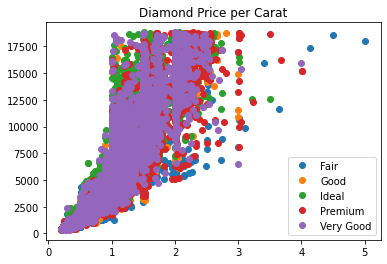

In [153]:
import matplotlib.pyplot as plt

cut_groups = df.groupby('cut')
for name, group in cut_groups:
    plt.plot(group.carat, group.price, marker='o', linestyle='', label=name)

plt.legend()
plt.title("Diamond Price per Carat")
plt.show()

Faça um gráfico de pontos do quilate (carat) em função do volume colorindo os pontos com uma cor para cada tipo de claridade (clarity). Você observa alguma relação entre essas variáveis?

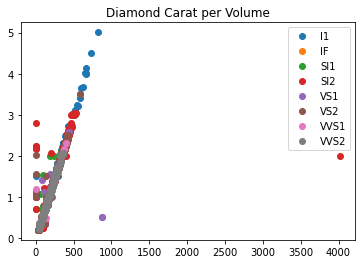

In [154]:
import matplotlib.pyplot as plt

clarity_groups = df.groupby('clarity')
for name, group in clarity_groups:
    plt.plot(group.volume, group.carat, marker='o', linestyle='', label=name)

plt.legend()
plt.title("Diamond Carat per Volume")
plt.show()